# A Data Science Case Study of the Probability of Default of Credit Card Clients

This purpose of this study is to determine the best performing model to predict the probability that a credit card client defaults in the next month given the data. The data is from a credit card company and contains some demographic and financial information of 30000 accounts and is available from the UCI Machine learning repository. The study goes through the various stages of a data science pipeline namely

1. Data Acquisition
2. Data Preparation/Cleaning
3. Exploratory Data Analysis
4. Modeling and Evaluation
5. Interpretation and Reporting of Results

The link to the data is provided here __[dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls)__

In [145]:
#Loading Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns 
mpl.rcParams['figure.dpi'] = 200 #for high resolution figures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


### Data Acquisition
The data is downloaded from the link provided above and is loaded into a pandas dataframe

In [2]:
#Loading the data into a dataframe
df = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls') 

### Data Preparation and Cleaning
The data has to be preprocessed to ensure the data is suitable for the analysis and predictive modeling process and does not lead to errroneus inference. The data is explored to check for common issues like missing values, duplicated values, incorrect values, outliers. The data dictionary also provided at the UCI Machine learning Repository gives us an idea of how our data should look like, and what are the normal ranges for the features in the data set.


The link to the data dictionary is provided here __[dictionary](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#)__

In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

The data metadata suggest there are no null values in our feature set and response. We investigate further for duplicates, incorrect values, outliers.

In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

__ID__ refers to the account ID  
  
__LIMIT_BAL__ refers to the amount of credit provided  
  
  
__SEX__ refers to Gender (1 = male; 2 = female).  
  
__EDUCATION__ refers to Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).  
  
__MARRIAGE__ refers to Marital status (1 = married; 2 = single; 3 = others).  
  
__AGE__ refers to Age (year).  
   
__PAY_1 TO PAY_6__ refers to History of past payment. The past monthly payment records (from April to September, 2005) as follows: PAY_1 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -2 = not used; -1 = pay duly; 0 =minumum paid; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  
  
__BILL_AMT1 TO BILL_AMT6__ refers to Amount of bill statement. BILL_AMT1 = amount of bill statement in September, 2005; BILL _AMT = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.  
  
__PAY_AMT1 TO PAY_AMT6__ refers to Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

 


In [9]:
## A visual inspection of the first five accounts of the data set
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


The __ID__ column seems to be a unique identifier for the accounts in the data set, and we can use it to check for __duplicates__ in the data 

In [10]:
## We check for the number of unique values in the dataset
df['ID'].nunique()

29687

__29687__ is less than the expected number of unique values which is 30000 indicating there are duplilcates. 

In [11]:
## We check for duplicates
id_counts = df['ID'].value_counts()
id_counts.head()


f7fe4368-18e7    2
e77f7765-8731    2
0ad143f2-bd95    2
9611f432-7f70    2
89f8f447-fca8    2
Name: ID, dtype: int64

It is evident that some accounts occur twice

In [12]:
## We check for number of duplicated accounts
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

We can see that 313 accounts ID occurs twice and must be investigated and removed if they truly represent dulicated data

In [16]:
## We create a boolean mask to indicate the ID that are duplicated
duplicated_mask = id_counts==2
duplicated_mask[:5]

f7fe4368-18e7    True
e77f7765-8731    True
0ad143f2-bd95    True
9611f432-7f70    True
89f8f447-fca8    True
Name: ID, dtype: bool

In [17]:
sum(duplicated_mask)

313

In [21]:
## We create a variable to store the indices of the duplicated ID and name it dupe_id
dupe_id = list(id_counts.index[duplicated_mask])
len(dupe_id)



313

In [23]:
## We filter the data set for the first four duplicated ID to examine the duplication
df.loc[df['ID'].isin(dupe_id[0:4]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
852,e77f7765-8731,50000,1,1,1,37,Not available,0,-2,-2,...,0,0,0,500,0,0,0,0,0,0
952,e77f7765-8731,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5006,9611f432-7f70,280000,2,1,2,31,Not available,-2,-2,-2,...,326,652,0,326,0,326,652,0,652,0
5106,9611f432-7f70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7320,f7fe4368-18e7,240000,2,2,2,42,-1,-1,-1,-1,...,4772,1294,2147,164820,11728,7738,1297,2153,2073,0
7420,f7fe4368-18e7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26816,0ad143f2-bd95,260000,1,1,2,29,-1,-1,-1,-1,...,500,5306,2091,1432,718,500,5306,0,770,0
26916,0ad143f2-bd95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We notice that the duplicated data have a row of zeros which is definitely invalid and non-informative data so we filter them out or remove those rows from our data set

In [25]:
## We find entries in the data set equal to zero
df_zero_mask = df==0

## We find rows with zeros in all columns excluding the ID column
all_zero_rows = df_zero_mask.iloc[:,1:].all(axis=1)

## We find the number of rows with all zero column excluding ID

sum(all_zero_rows)

315

This indicates there were two additional rows with all zero but with unique ID so are still non-informative.  
We __REMOVE__ the duplicated and non informative rows

In [29]:
df_clean_1 = df.loc[~all_zero_rows,:].copy()
df_clean_1.shape

(29685, 25)

In [30]:
df_clean_1['ID'].nunique()

29685

In [31]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

From our data dictionary we expect the feature set and response to be of numeric data type, so we investigate __PAY_1__ because it is showing the object data type.  
A quick way to inspect the data in __PAY_1__ is to use value_counts

In [32]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

The values 0 and -2 were not stated in the data dictionary for __PAY_1__ also the string 'Not available' seems to indicate missing data. For now we take out the rows with the missing data for __PAY_1__ and keep the rows with values 0 and -2 because they have large counts and may indicate unstated categories.

In [39]:
## We create a boolean mask to filter out missing data for PAY_1

valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'


In [40]:
valid_pay_1_mask.value_counts()

True     26664
False     3021
Name: PAY_1, dtype: int64

In [41]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26664, 25)

We convert the data type of __PAY_1__ to int64 to prevent issues with the machine learning models

In [43]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [44]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

It is easier to use visualization and summary statistics to quickly inspect features and response to ensure the values are in their expected ranges and that there are no unxpected values. 

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'LIMIT_BAL'}>]], dtype=object)

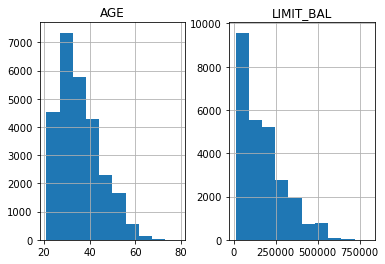

In [50]:
## We inspect AGE and LIMIT_BAL with histograms

df_clean_2[['AGE','LIMIT_BAL']].hist()

In [51]:
## We inspect AGE and LIMIT_BAL with summary statistics
df_clean_2[['AGE','LIMIT_BAL']].describe()

,AGE,LIMIT_BAL
count,26664.000000,26664.000000
mean,35.505213,167919.054905
std,9.227442,129839.453081
min,21.000000,10000.000000
25%,28.000000,50000.000000
50%,34.000000,140000.000000
75%,41.000000,240000.000000
max,79.000000,800000.000000


The ranges for both features seem reasonably distributed

Categorical features seem best investigated with value_counts

In [67]:
df_clean_2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [68]:
## We check the value counts for sex

df_clean_2['SEX'].value_counts()

2    16080
1    10584
Name: SEX, dtype: int64

In [52]:
## We check the value counts for education

df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

The data dictionary describes only the values 1,2,3,4 as graduate school, university, high school and others respectively.  
The values 0,5,6 are few and not described, so we add them to others for this study

In [54]:
## code to replace values

df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [55]:
## We check the value counts for MARRIAGE

df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

The data dictionarydescribes the values 1=married, 2=single, 3=others and 0 is undefined in the dictionary, so we add it to the others category


In [56]:
## code to replace values

df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Most of the categorical features in the data set have ordinal encoding however that might no represent the relationship between the feature and the response variable. An Example is shown below

Text(0.5, 0, 'Sex level: ordinal encoding')

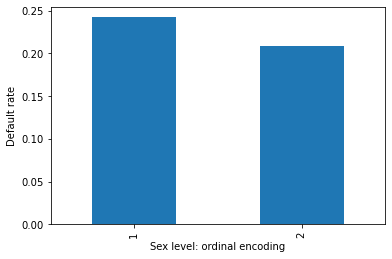

In [59]:
df_clean_2.groupby('SEX').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Sex level: ordinal encoding')

Text(0.5, 0, 'Education level: ordinal encoding')

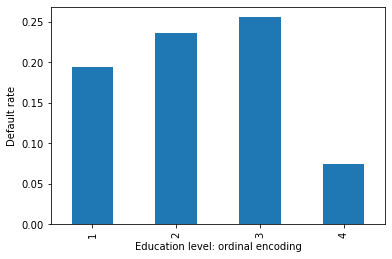

In [57]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

Text(0.5, 0, 'Marriage level: ordinal encoding')

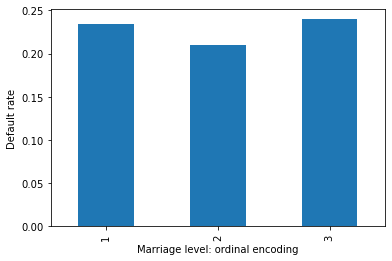

In [58]:
df_clean_2.groupby('MARRIAGE').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Marriage level: ordinal encoding')

These features may be better represented by One Hot Encoding, though that increases the dimensions and introduce sparsity  
the individual features have few unique levels to introduce to much dimensionality.

In [69]:
df_clean_2['SEX_CAT'] = 'none'

cat_mapping = {
    1: "Male",
    2: "Female"
}

df_clean_2['SEX_CAT'] = df_clean_2['SEX'].map(cat_mapping)

sex_ohe = pd.get_dummies(df_clean_2['SEX_CAT'])

In [70]:
df_clean_2['EDUCATION_CAT'] = 'none'

cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)

edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])

In [71]:
df_clean_2['MARRIAGE_CAT'] = 'none'

cat_mapping = {
    1: "Married",
    2: "Single",
    3: "Other"
}

df_clean_2['MARRIAGE_CAT'] = df_clean_2['MARRIAGE'].map(cat_mapping)

marriage_ohe = pd.get_dummies(df_clean_2['MARRIAGE_CAT'])

In [73]:
df_with_ohe = pd.concat([df_clean_2, sex_ohe, edu_ohe, marriage_ohe], axis=1)


In [75]:
df_with_ohe[['SEX_CAT', 'Male',
             'Female']].head(10)

,SEX_CAT,Male,Female
0,Female,0,1
1,Female,0,1
2,Female,0,1
3,Female,0,1
4,Male,1,0
5,Male,1,0
6,Male,1,0
7,Female,0,1
8,Female,0,1
9,Male,1,0


In [76]:
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [77]:
df_with_ohe[['MARRIAGE_CAT', 'Married',
             'Single', 'Other']].head(10)

,MARRIAGE_CAT,Married,Single,Other
0,Married,1,0,0
1,Single,0,1,0
2,Single,0,1,0
3,Married,1,0,0
4,Married,1,0,0
5,Single,0,1,0
6,Single,0,1,0
7,Single,0,1,0
8,Married,1,0,0
9,Single,0,1,0


In [ ]:
# df_with_ohe.to_csv('../Data/Chapter_1_cleaned_data.csv', index=False)

In [78]:
df =df_with_ohe.copy()

We explore the categorical financial history features next

In [81]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [83]:
for feat in pay_feats:
    print(df[feat].value_counts().sort_index())

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64
-2     3375
-1     5368
 0    13961
 1       24
 2     3509
 3      289
 4       85
 5       24
 6       11
 7       17
 8        1
Name: PAY_2, dtype: int64
-2     3654
-1     5290
 0    13968
 1        3
 2     3400
 3      214
 4       69
 5       20
 6       19
 7       24
 8        3
Name: PAY_3, dtype: int64
-2     3893
-1     5070
 0    14596
 1        2
 2     2798
 3      161
 4       57
 5       30
 6        4
 7       51
 8        2
Name: PAY_4, dtype: int64
-2     4056
-1     4949
 0    15032
 2     2335
 3      151
 4       71
 5       14
 6        2
 7       53
 8        1
Name: PAY_5, dtype: int64
-2     4366
-1     5138
 0    14416
 2     2476
 3      156
 4       43
 5       10
 6       15
 7       42
 8        2
Name: PAY_6, dtype: int64


All the unique values for the categorical financial history features are in the expected range per the data dictionary

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

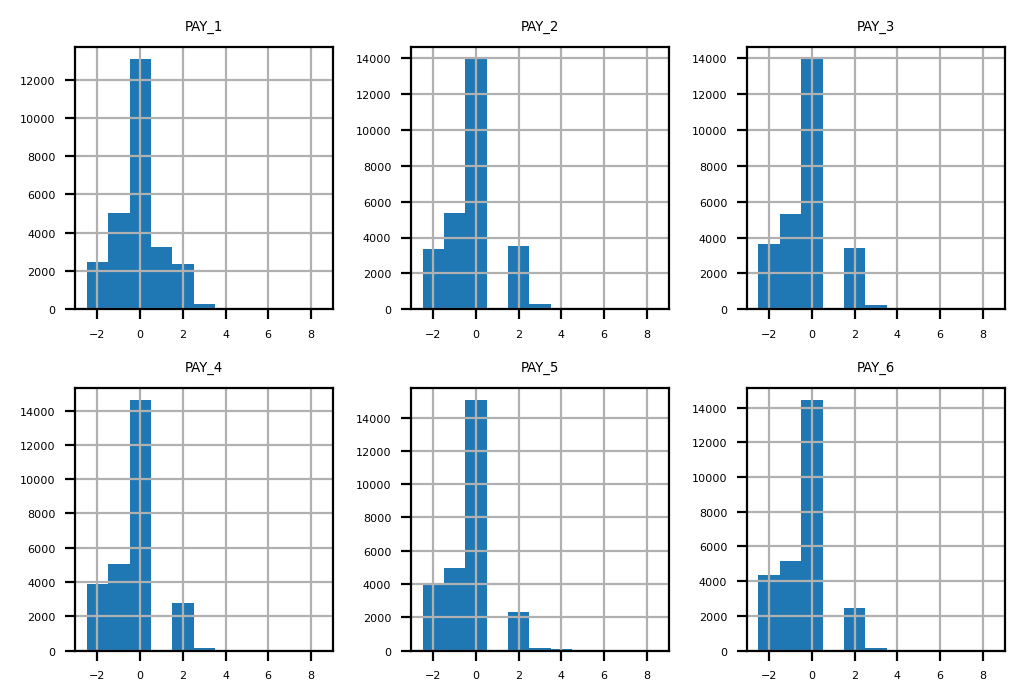

In [85]:
pay_1_bins = np.array(range(-2,10)) - 0.5
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

From the histograms we can see some issues in __PAY_2 to PAY_6__, __PAY_3__ represent July and __PAY_2__ represent August. We can see that in July there are few accounts with a 1 month delay in payment ( Value count for 1 is very low), however in August the are several accounts with a 2 month delay in payment( Value count for 2 is almost 4000).  
We investigate this with observations from the data frame.

In [86]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2


We can see that the values in __PAY_3__ should have been 1 when the values in __PAY_2__ is 2 and this occurs for most of the categorical financial history features except __PAY_1__. So we shall drop all the others from our study except __PAY_1__

We explore the remaining features in the dataset

In [87]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [88]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

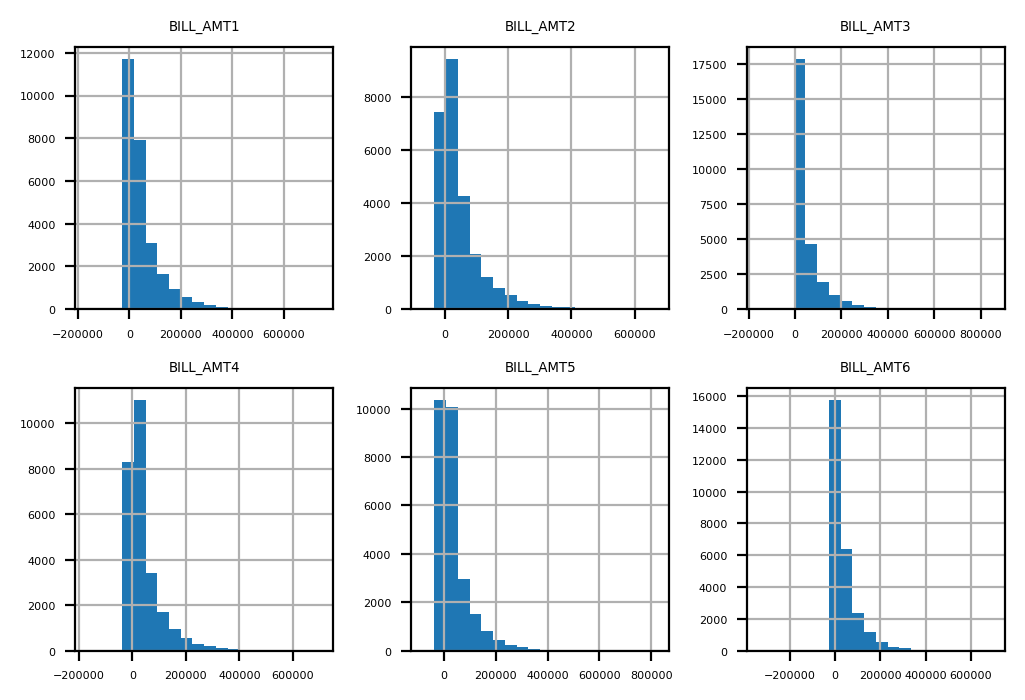

In [89]:
df[bill_feats].hist(bins=20, layout=(2,3))

In [90]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

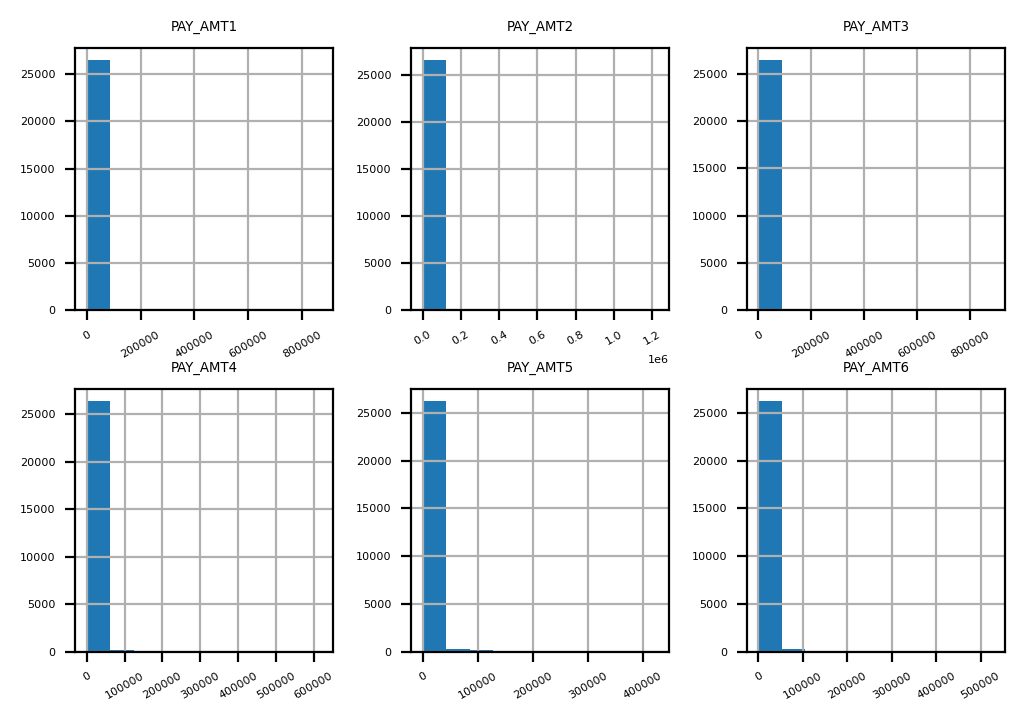

In [91]:
df[pay_amt_feats].hist(layout=(2,3), xrot=30)

In [92]:
pay_zero_mask = df[pay_amt_feats] == 0
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [93]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

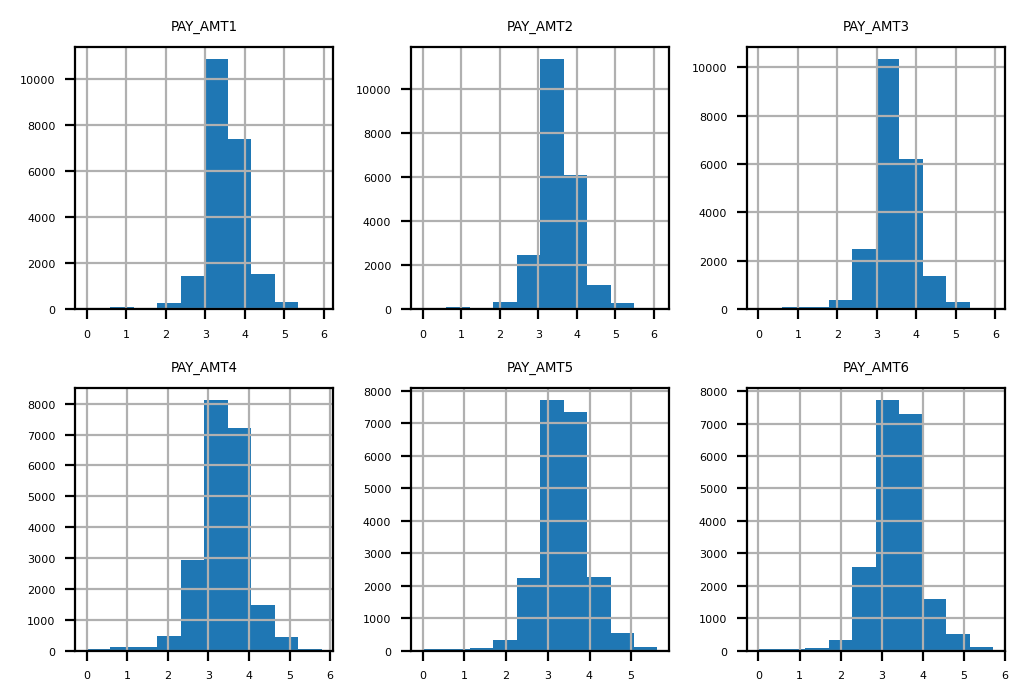

In [94]:
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))

We investigate the response/dependent variable

In [95]:
df['default payment next month'].mean()

0.2217971797179718

In [96]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

The value 1 indicates our positive class of clients who default payment next month and 22% of our data set belong to the positive class.

We examine the relationship between features and response

In [98]:
df.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'SEX_CAT',
 'EDUCATION_CAT',
 'MARRIAGE_CAT',
 'Female',
 'Male',
 'graduate school',
 'high school',
 'others',
 'university',
 'Married',
 'Other',
 'Single']

In [99]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX_CAT', 
                   'MARRIAGE_CAT', 'EDUCATION_CAT']

In [100]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'Female',
 'Male',
 'graduate school',
 'high school',
 'others',
 'university',
 'Married',
 'Other',
 'Single']

In [101]:
features_response = ['LIMIT_BAL', 'AGE', 'Female', 'Male', 'graduate school', 'high school', 'others', 
                     'university', 'Married', 'Other', 'Single', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2',
                     'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                     'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

In [102]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,AGE,Female,Male,graduate school
LIMIT_BAL,1.000000,0.149157,0.027046,-0.027046,0.260582
AGE,0.149157,1.000000,-0.088421,0.088421,-0.096956
Female,0.027046,-0.088421,1.000000,-1.000000,-0.022777
Male,-0.027046,0.088421,-1.000000,1.000000,0.022777
graduate school,0.260582,-0.096956,-0.022777,0.022777,1.000000


<AxesSubplot:>

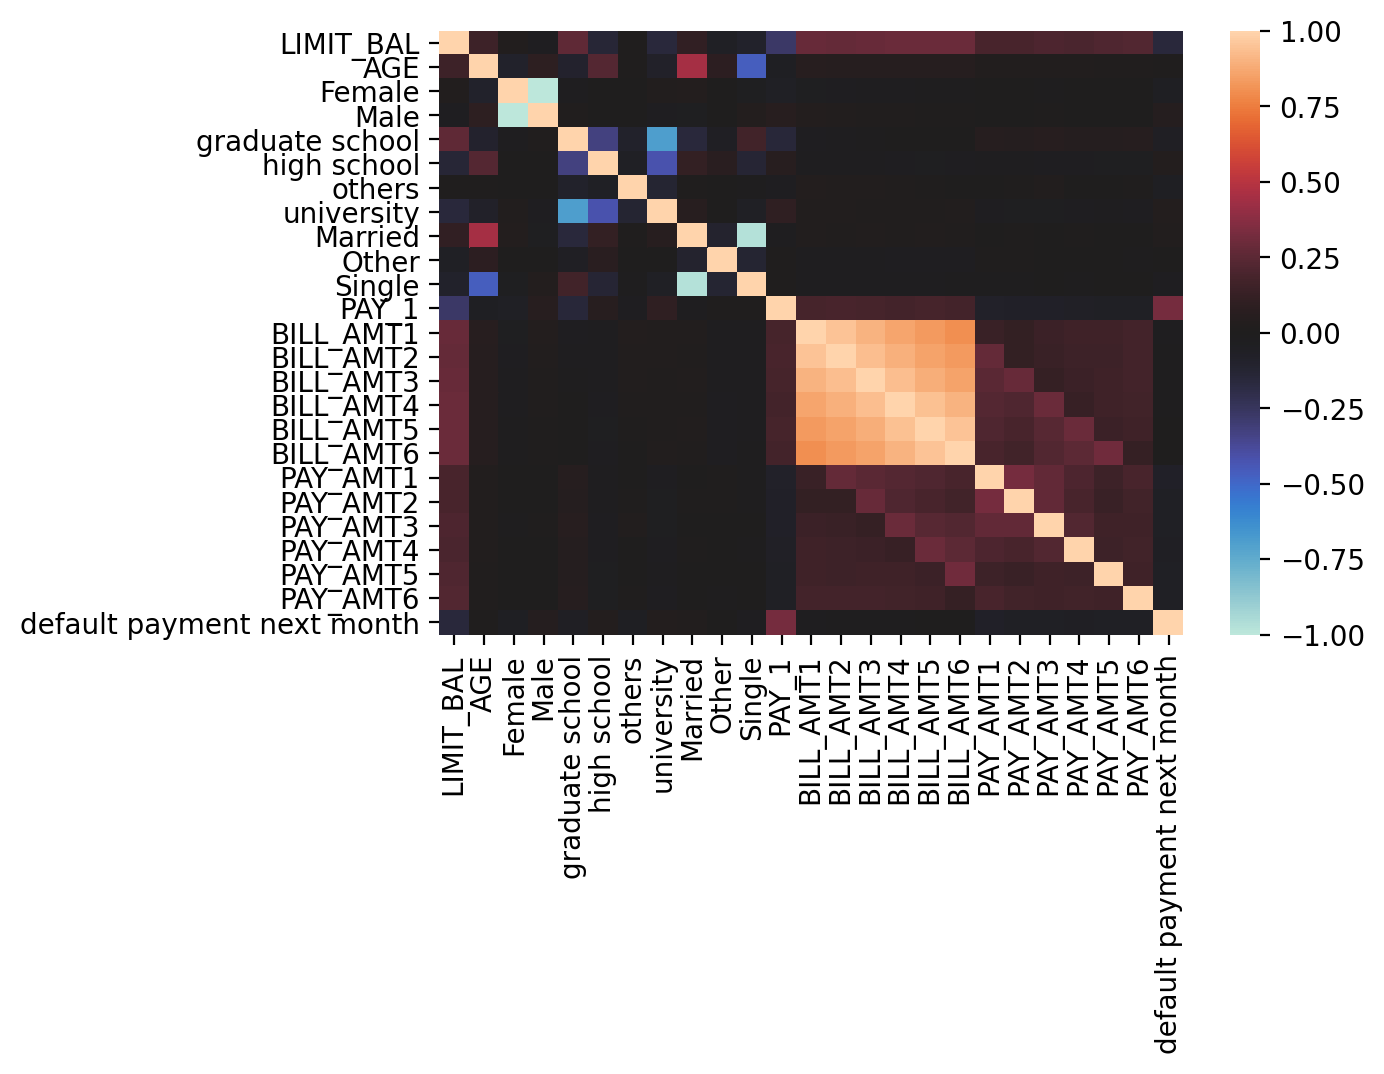

In [103]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

In [104]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 24) (26664,)


In [105]:
from sklearn.feature_selection import f_classif

In [106]:
[f_stat, f_p_value] = f_classif(X, y)

In [107]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
11,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
18,PAY_AMT1,140.612679,2.358354e-32
19,PAY_AMT2,101.408321,8.256124e-24
20,PAY_AMT3,90.023873,2.542641e-21
22,PAY_AMT5,85.843295,2.090120e-20
23,PAY_AMT6,80.420784,3.219565e-19
21,PAY_AMT4,79.640021,4.774112e-19
4,graduate school,65.740474,5.362790e-16
6,others,52.689257,4.014059e-13


To select the top 20% of features according to the F-Test we use the SelectPercentile function

In [108]:
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile=20)
selector.fit(X, y)
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False])

In [109]:
features = features_response[:-1]

In [110]:
best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]

In [111]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']

In [112]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [113]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


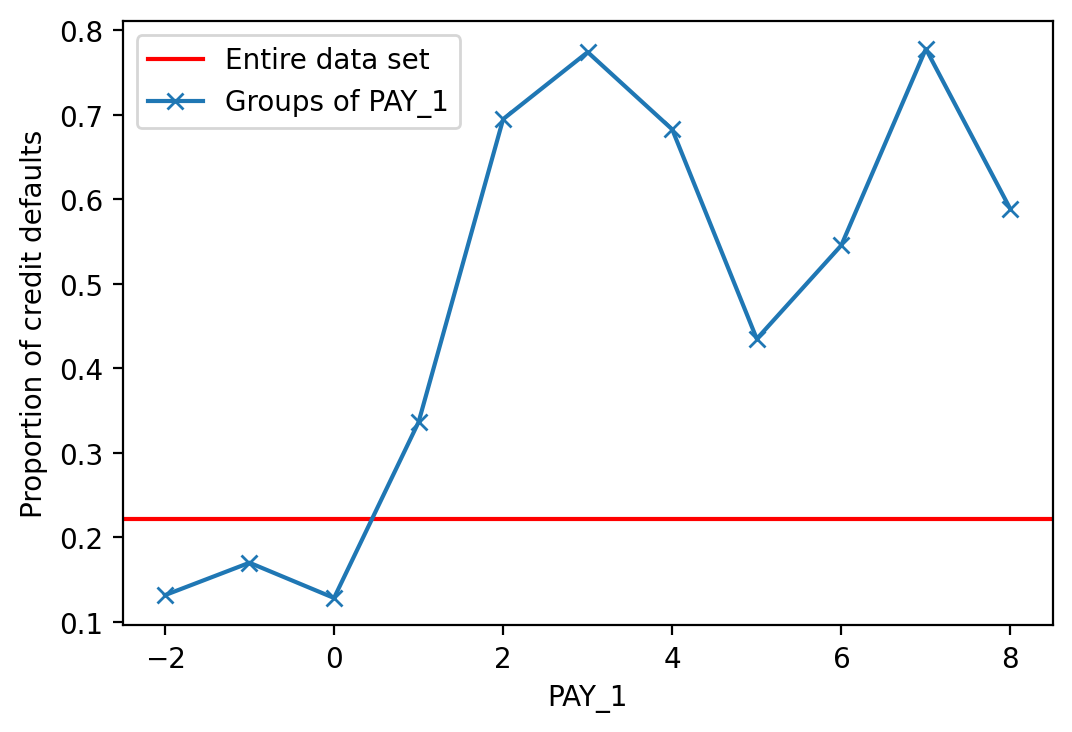

In [114]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire data set', 'Groups of PAY_1'])

In [115]:
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

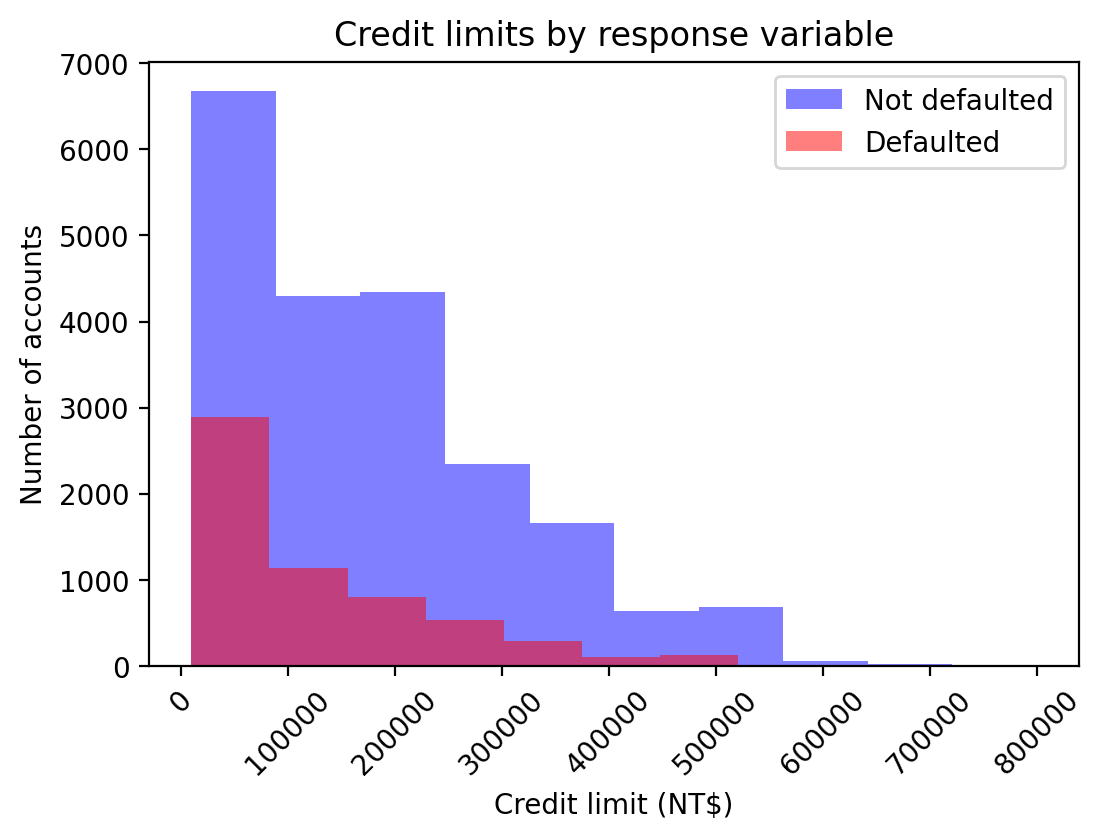

In [116]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

## Modeling and Evaluation

Make a train/test split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [118]:
print(X_train.shape)
print(X_test.shape)

(21331, 24)
(5333, 24)


In [146]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test) 

0.8141758859928746